In [ ]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,InputLayer, Input,Dropout
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import Adam ,RMSprop ,Adagrad,SGD





In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Shape of y train after one-hot encoding:", y_train.shape)


Shape of y train after one-hot encoding: (60000, 10)


In [ ]:
#X_train = tf.keras.utils.normalize(X_train, axis=1)
#X_test = tf.keras.utils.normalize(X_test, axis=1)


X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255



In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
print(X_train.shape)
X_test.shape

(60000, 28, 28)


(10000, 28, 28)

In [ ]:
X_train.shape[1]

28

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='relu'),
    #Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(.45),
    Dense(1024, activation='relu'),
    #Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(.45),
    Dense(10, activation='softmax')
])



In [ ]:


optimizer = Adagrad(learning_rate=0.01)
optimizer2 = RMSprop(learning_rate=0.001)  #0.001 98.56 ,.0005  98.68
optimizer3 = Adam(learning_rate=0.0001)
optimizer4 = SGD(learning_rate=0.0001)

model.compile(optimizer=optimizer2, loss='categorical_crossentropy', metrics=['accuracy'] )   #SparseCategoricalCrossentropy  categorical_crossentropy

In [ ]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,863,690 (7.11 MB)

 Trainable params: 1,863,690 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True,mode='min')
model.fit(X_train, y_train, epochs=130, batch_size=256, validation_split=0.1 )#, callbacks=[early_stopping]

Epoch 1/130
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8003 - loss: 0.6146 - val_accuracy: 0.9662 - val_loss: 0.1138
Epoch 2/130
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9534 - loss: 0.1537 - val_accuracy: 0.9742 - val_loss: 0.0851
Epoch 3/130
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9669 - loss: 0.1052 - val_accuracy: 0.9770 - val_loss: 0.0738
Epoch 4/130
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9742 - loss: 0.0822 - val_accuracy: 0.9787 - val_loss: 0.0697
Epoch 5/130
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9794 - loss: 0.0657 - val_accuracy: 0.9783 - val_loss: 0.0752
Epoch 6/130
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9808 - loss: 0.0603 - val_accuracy: 0.9848 - val_loss: 0.0616
Epoch 7/130
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9842 - loss: 0.0509 - val_accuracy: 0.9838 - val_loss: 0.0663
Epoch 8/130
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9846 - loss: 0.0472 - val_acc

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9825 - loss: 0.1301
Test Accuracy: 0.9858


In [ ]:
len(X_test)

10000

In [ ]:
predictions = model.predict(X_test)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.13507776e-23, 7.29153197e-22, 9.08034488e-22, ...,
        1.00000000e+00, 6.51009496e-26, 5.40751094e-17],
       [2.00607686e-25, 4.97679417e-15, 1.00000000e+00, ...,
        4.76605501e-24, 3.75558169e-28, 1.66538578e-35],
       [2.16940384e-22, 1.00000000e+00, 2.37418749e-21, ...,
        9.08469901e-17, 3.69217288e-19, 2.88990626e-26],
       ...,
       [1.81998852e-32, 5.83002968e-25, 1.17565065e-33, ...,
        1.70499939e-24, 8.68726909e-28, 6.16319079e-25],
       [4.97802824e-30, 3.16315864e-34, 5.23679249e-41, ...,
        2.30799224e-34, 2.71899654e-23, 2.84955489e-34],
       [1.41819703e-26, 9.78698279e-27, 1.87333617e-28, ...,
        5.63664908e-38, 8.15885246e-27, 5.23601130e-29]], dtype=float32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


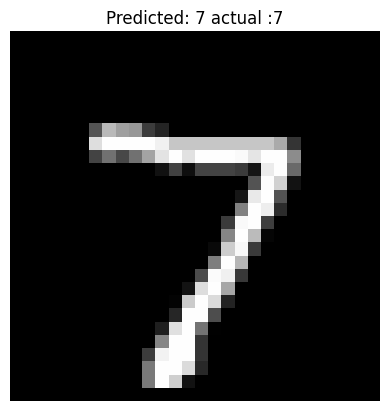

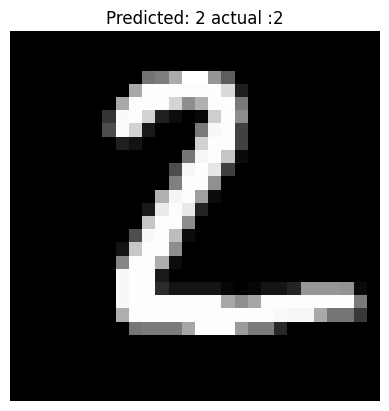

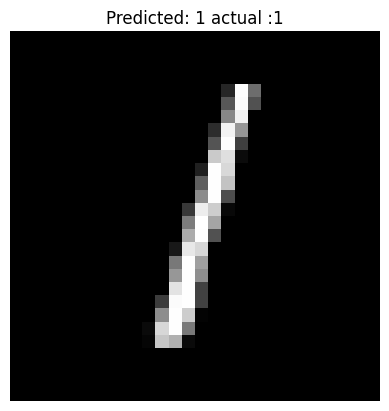

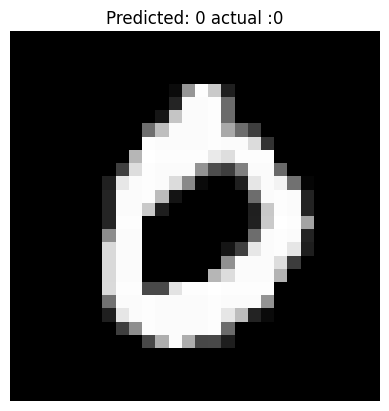

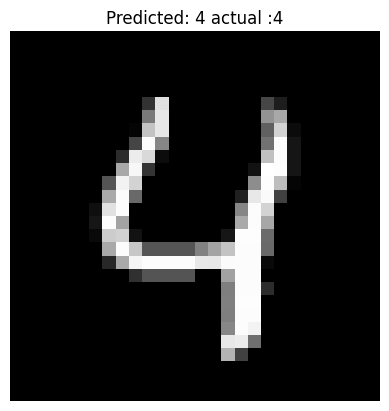

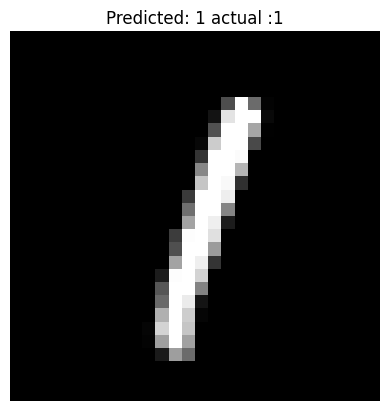

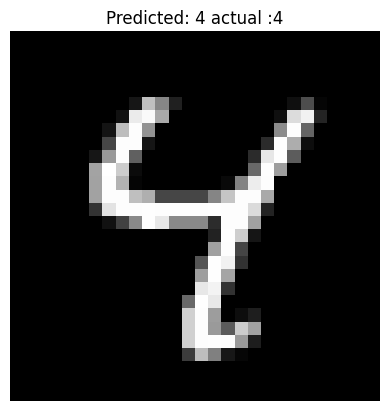

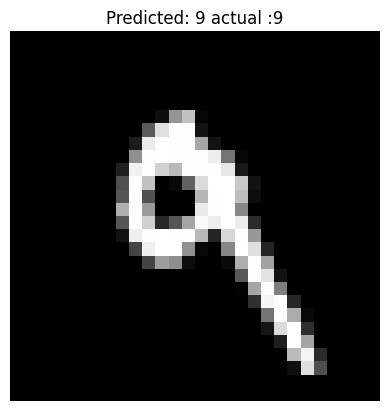

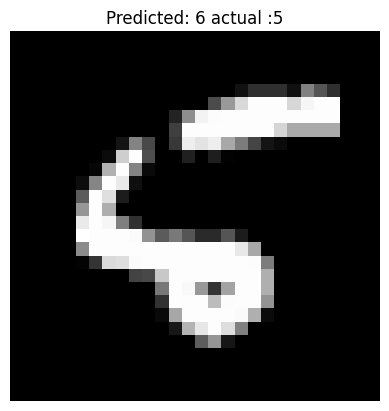

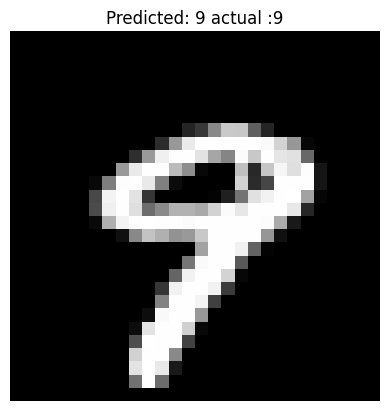

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
flase_predict=0
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]} actual :{np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()

In [ ]:
for i in range(len(X_test)):
    if predicted_labels[i] !=np.argmax(y_test[i]):
      flase_predict+=1

In [ ]:
print(flase_predict)

142
